In [2]:
pip install pandas rdflib openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from rdflib import Graph

# Membaca file Excel
data_parfum = pd.read_excel('DATA_PARFUM.xlsx', skiprows=4, names=[
    'Varian', 'Ukuran_Botol', 'Gender', 'Jenis_Parfum', 'Harga', 'Karakter_Wangi', 'Rating', 'Komentar_1', 'Komentar_2', 'Komentar_3'
])

# Menampilkan data yang telah dibaca
print(data_parfum.head())

                          Varian Ukuran_Botol  Gender Jenis_Parfum Harga  \
0     cuddle ( Cute dan bandel )         50ml  unisex          edp   145   
1  tabrani ( tampan dan berani )         50ml    pria          edp   145   
2                         oliver        50 ml  unisex          edp   145   
3     candu  ( cantik dan lugu )        50 ml  wanita          edp   145   
4                            NaN          NaN     NaN          NaN   NaN   

       Karakter_Wangi  Rating  \
0    fruity and fresh     4.9   
1  manly & charismaty     4.9   
2     vanila & coffee     4.9   
3    fruity and sweet     4.9   
4                 NaN     NaN   

                                          Komentar_1  \
0   Shopee : @ficaramel : Wanginya enak cocok ban...   
1  Shopee @horizon.footwear : wanginya cool dan s...   
2  Shopee @nandarezkys : Lain kali bakal coba wan...   
3  Shopee @dwiislamiea : suka banget sama candu i...   
4                                                NaN   

       

In [5]:
data_parfum

,Varian,Ukuran_Botol,Gender,Jenis_Parfum,Harga,Karakter_Wangi,Rating,Komentar_1,Komentar_2,Komentar_3
0,cuddle ( Cute dan bandel ),50ml,unisex,edp,145,fruity and fresh,4.9,Shopee : @ficaramel : Wanginya enak cocok ban...,"Shopee : @fitrimeydiyy : Wanginya enakkk,\n t...","twiiter @Cindianaaaa : ini nder, Awet banget. ..."
1,tabrani ( tampan dan berani ),50ml,pria,edp,145,manly & charismaty,4.9,Shopee @horizon.footwear : wanginya cool dan s...,Shopee @gariskhatulistw : untuk aroma yang in...,"Shopee @rian.mh : Wanginya manly banget, bikin..."
2,oliver,50 ml,unisex,edp,145,vanila & coffee,4.9,Shopee @nandarezkys : Lain kali bakal coba wan...,"Shopee : @fitrimeydiyy : Wanginya enak, \nmani...",Shopee @racha.safira27 : Wanginya enak banget ...
3,candu ( cantik dan lugu ),50 ml,wanita,edp,145,fruity and sweet,4.9,Shopee @dwiislamiea : suka banget sama candu i...,"Shopee @rian.mh : Wanginya soft, fresh dan \ne...",NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
281,51. Verites 4 (DONE),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,Joie De Vivre,50ml,Wanita,edp,169,"Strawberry, Pineapple, Rose, Jasmine",4.9,Shopee @sapphireunicorn : wangi parfumnya enak...,Shopee @teh_uti : Wanginya enak bgt\n dan taha...,NaN
283,After The Rain,50ml,Wanita,edp,169,"Almond, Chocolate, Black currant",4.9,Shopee @sarahlutfianiputri : Wanginya enakkk b...,"Shopee @fauziaaahan : wanginya segar,\n enak b...",NaN
284,Secretly Sexy,50ml,Unisex,edp,169,"Apple, Orange, Lily, Vanilla",4.9,Shopee @rufiantheodora : baru kali ini nyobain...,NaN,NaN


In [6]:
# Membaca file ontologi
g = Graph()
g.parse('sdkparfume.rdf', format='xml')

# Contoh SPARQL query untuk mengambil data dari ontologi
query = """
PREFIX parf: <http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#>
SELECT ?parfum ?Varian ?Rating ?Ukuran_Botol ?Jenis_Parfum ?Harga ?Karakter_Wangi ?Jenis_Kelamin ?Komentar_1 ?Komentar_2 ?Komentar_3
WHERE {
    ?parfum parf:untuk ?Jenis_Kelamin .
    ?parfum parf:Varian ?Varian .
    ?parfum parf:Rating ?Rating .
    ?parfum parf:Ukuran_Botol ?Ukuran_Botol .
    ?parfum parf:Jenis_Parfum ?Jenis_Parfum .
    ?parfum parf:Harga ?Harga .
    ?parfum parf:Karakter_Wangi ?Karakter_Wangi .
    ?parfum parf:Komentar_1 ?Komentar_1 .
    ?parfum parf:Komentar_2 ?Komentar_2 .
    ?parfum parf:Komentar_3 ?Komentar_3 .
}
ORDER BY ?Harga
"""
results = g.query(query)

for row in results:
    print(f"Parfum: {row.parfum}, Varian: {row.Varian}, Harga: {row.Harga}")

Parfum: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#Nemon, Varian: LILITH & EVE Nemon, Harga: 78
Parfum: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#Saff, Varian: SAFF & CO Saff, Harga: 229
Parfum: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#black_opium, Varian: JOLIBLISS Black Opium, Harga: 19000
Parfum: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#Ladyboss, Varian: JOLIBLISS Ladyboss, Harga: 20000
Parfum: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#Cherry_Blossom, Varian: VLAGIO Cherry Blossom, Harga: 23000
Parfum: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#Sunshine, Varian: VLAGIO Sunshine, Harga: 23000
Parfum: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#Velove, Varian: VLAGIO Velove, Harga: 23000
Parfum: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#Boomshell, Varian: HEU

In [11]:
pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.0 MB 9.4 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/8.0 MB 8.8 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 7.9 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 7.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 6.9 MB/s eta 0:00:00
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
 

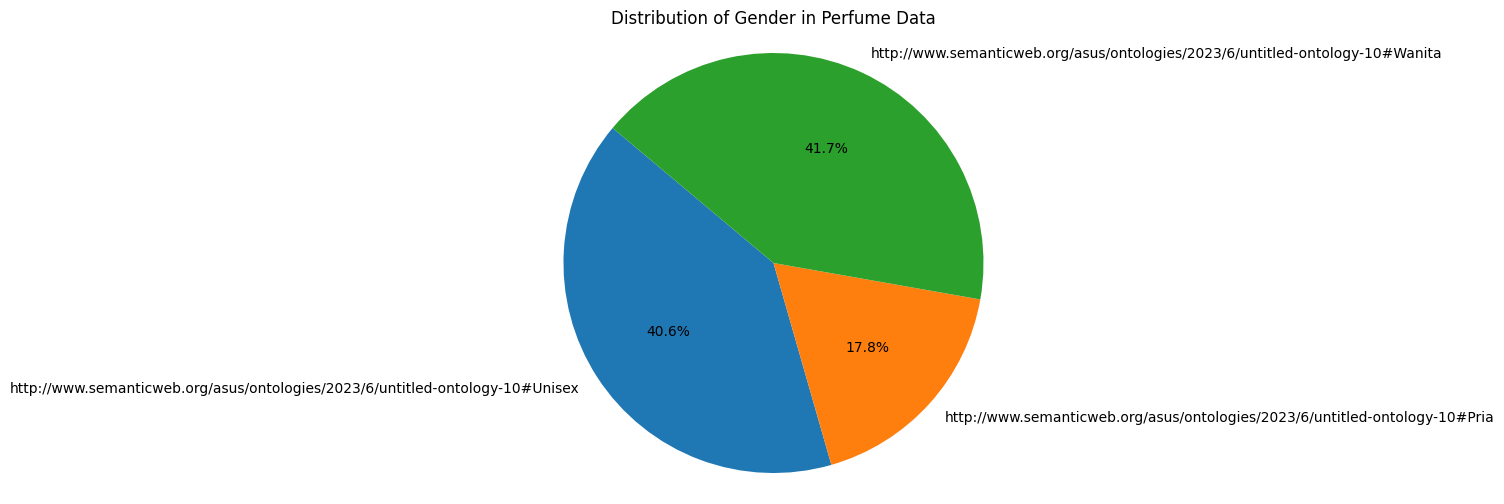

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
from collections import Counter

# Extract gender data
genders = [str(row.Jenis_Kelamin) for row in results]

# Count the occurrences of each gender
gender_counts = Counter(genders)

# Prepare labels and sizes for the pie chart
labels = gender_counts.keys()
sizes = gender_counts.values()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Gender in Perfume Data")
plt.show()

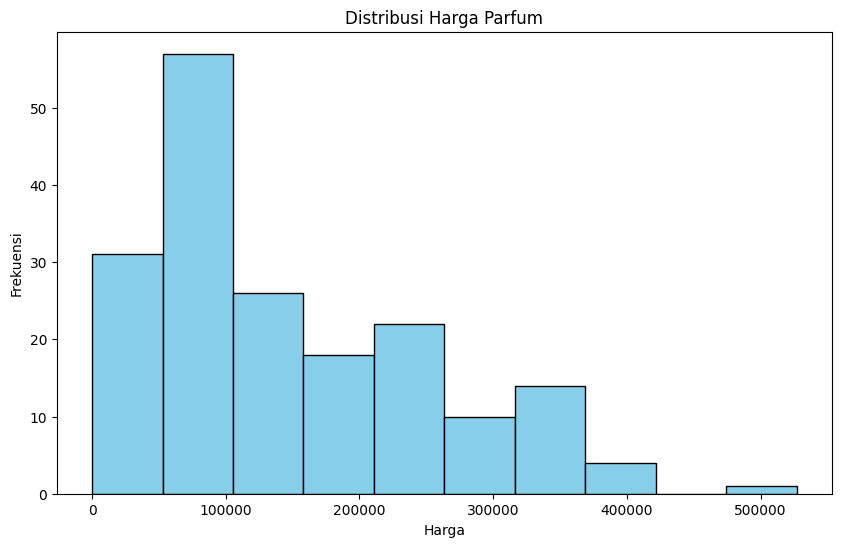

In [13]:
# Extracting Harga data from the query results
harga_query = """
PREFIX parf: <http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#>
SELECT ?Harga
WHERE {
    ?parfum parf:Harga ?Harga .
}
"""
harga_results = g.query(harga_query)
harga_list = [float(row.Harga) for row in harga_results]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(harga_list, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribusi Harga Parfum")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()


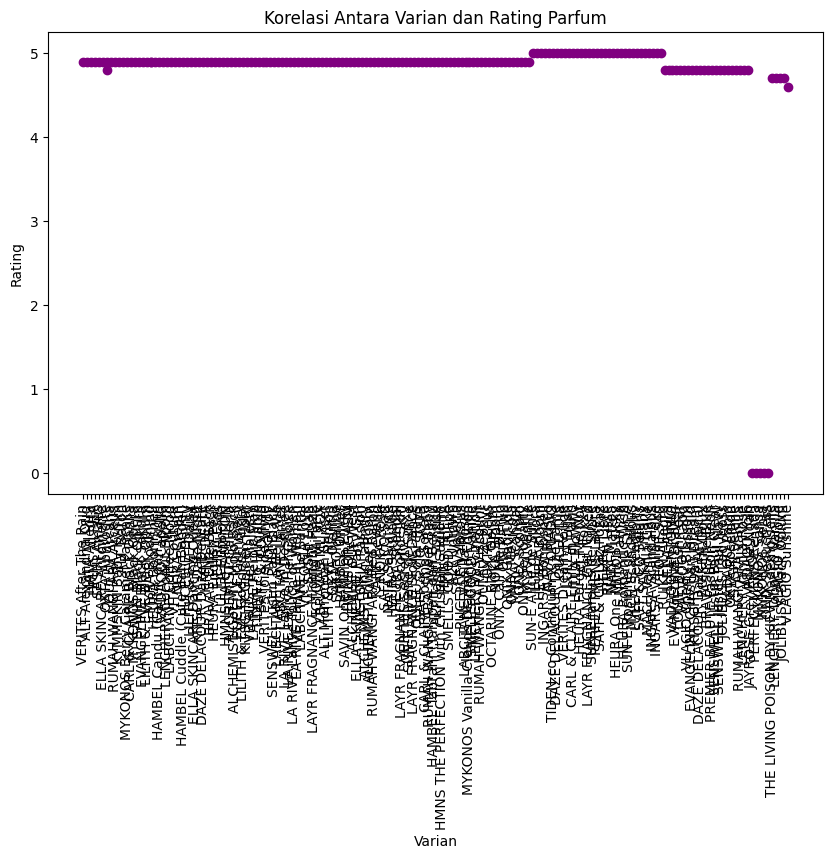

In [14]:
# Extracting Rating and Varian data
rating_varian_query = """
PREFIX parf: <http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#>
SELECT ?Varian ?Rating
WHERE {
    ?parfum parf:Varian ?Varian .
    ?parfum parf:Rating ?Rating .
}
"""
rating_varian_results = g.query(rating_varian_query)
rating_varian_list = [(str(row.Varian), float(row.Rating)) for row in rating_varian_results]

# Preparing data for scatter plot
varian = [item[0] for item in rating_varian_list]
rating = [item[1] for item in rating_varian_list]

plt.figure(figsize=(10, 6))
plt.scatter(varian, rating, color='purple')
plt.title("Korelasi Antara Varian dan Rating Parfum")
plt.xlabel("Varian")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.show()


In [25]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rdflib import Graph
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load stopwords Bahasa Indonesia
stopwords_indonesia = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Convert query results to a DataFrame
data = []
for row in results:
    combined_comments = " ".join([str(row.Komentar_1), str(row.Komentar_2), str(row.Komentar_3)])
    data.append({
        'Jenis_Kelamin': str(row.Jenis_Kelamin),
        'Varian': str(row.Varian),
        'Rating': str(row.Rating),
        'Ukuran_Botol': str(row.Ukuran_Botol),
        'Jenis_Parfum': str(row.Jenis_Parfum),
        'Harga': str(row.Harga),
        'Karakter_Wangi': str(row.Karakter_Wangi),
        'Combined_Comments': combined_comments
    })

df = pd.DataFrame(data)

# Combine relevant columns with different weights
df['Textual_Data'] = (
    df['Jenis_Kelamin'] + " " +
    df['Varian'] + " " +
    (df['Rating'].astype(str) + " ") * 2 +  # Assigning more weight to Rating
    (df['Karakter_Wangi'] + " ") * 2 +  # Assigning more weight to Karakter_Wangi
    df['Jenis_Parfum'] + " " +
    df['Harga'].astype(str) + " " +
    df['Combined_Comments']
)

# Vectorization using TF-IDF with hyperparameter tuning
vectorizer = TfidfVectorizer(
    stop_words=stopwords_indonesia,
    ngram_range=(1, 2),  # Consider unigrams and bigrams
    max_df=0.8,  # Ignore terms that appear in more than 80% of the documents
    min_df=2  # Ignore terms that appear in fewer than 2 documents
)
tfidf_matrix = vectorizer.fit_transform(df['Textual_Data'])

# Function for searching based on cosine similarity
def search_perfume(query, tfidf_matrix, df):
    query_tfidf = vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()
    top_indices = cosine_similarities.argsort()[-5:][::-1]  # Get top 5 most similar perfumes
    results = df.iloc[top_indices].copy()
    results['Similarity'] = cosine_similarities[top_indices]
    return results

# Input Searching
user_input = input("Enter your search query (e.g., 'citrus fresh'): ")
search_results = search_perfume(user_input, tfidf_matrix, df)

# Display the search results
for index, row in search_results.iterrows():
    print(f"Parfum: {row['Varian']}, Similarity: {row['Similarity']:.2f}")
    print(f"Jenis Kelamin: {row['Jenis_Kelamin']}")
    print(f"Rating: {row['Rating']}")
    print(f"Ukuran Botol: {row['Ukuran_Botol']}")
    print(f"Jenis Parfum: {row['Jenis_Parfum']}")
    print(f"Harga: {row['Harga']}")
    print(f"Karakter Wangi: {row['Karakter_Wangi']}")
    print(f"Komentar: {row['Combined_Comments']}")
    print("\n")

c:\Users\Rendra\Downloads\Web Ontology\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


Parfum: VLAGIO Sunshine, Similarity: 0.53
Jenis Kelamin: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#Wanita
Rating: 4.6
Ukuran Botol: 100
Jenis Parfum: Eau de Parfum (EDP)
Harga: 23000
Karakter Wangi: Caramel & musk
Komentar: Twitter @chaeLicious : Paling enak wanginya vlagio, seger banget - -


Parfum: VLAGIO Velove, Similarity: 0.41
Jenis Kelamin: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#Wanita
Rating: 4.7
Ukuran Botol: 100
Jenis Parfum: Eau de Parfum (EDP)
Harga: 23000
Karakter Wangi: Sweet
Komentar: - - -


Parfum: VLAGIO Cherry Blossom, Similarity: 0.22
Jenis Kelamin: http://www.semanticweb.org/asus/ontologies/2023/6/untitled-ontology-10#Wanita
Rating: 4.8
Ukuran Botol: 100
Jenis Parfum: Eau de Parfum (EDP)
Harga: 23000
Karakter Wangi: Blackberry, rose & caramel
Komentar: Shopee @d4mara : Wanginya okelah untuk wanita, tapi ketahanan hanya sampai 3 jam saya rasa. Dan wangi juga tidak menyengat kok Shopee @mmnewfashion : Mante

In [1]:
print(df[['Varian', 'Harga']].head())  # Debugging untuk melihat apakah harga di dataframe benar


NameError: name 'df' is not defined